## Sentiment Analysis of Headlines From 3/21/2020 to 5/12/2020
[Dataset](https://www.kaggle.com/gabrielmilan/multipurpose-world-news-dataset)

In [21]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
news_clean = pd.read_csv("/Users/vickijtruong/Documents/DF2020/news_clean.csv", encoding= 'unicode_escape')
news = news_clean[['title', 'description']]
news.insert(2,'date', pd.to_datetime(news_clean['date']))
news[0:4]

,title,description,date
0,New York City-area airports halt air traffic a...,The FAA said air traffic was halted at New Yor...,2020-03-21
1,Airline CEOs promise to eliminate dividends an...,CEOs from America's largest publicly traded ai...,2020-03-21
2,Market Basket joins list of grocery stores mod...,The modified schedule begins Monday for all Ma...,2020-03-21
3,What Happens If Oil Prices Go Negative - OilPr...,The combination of the Saudi Arabia vs Russia ...,2020-03-21


In [2]:
import nltk
from nltk import tokenize

In [3]:
titles = (list(news['title']))
#full_titles = ' '.join([str(elem) for elem in titles]) 
#tokenized = tokenize.word_tokenize(full_titles.lower())

## Using Vader

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

In [5]:
vader_sents = []
for sentence in titles:
    vader_sents.append(analyser.polarity_scores(sentence)['compound'])

In [6]:
news.insert(3, "compound", vader_sents)

In [7]:
print(news['compound'].mean())

-0.03721074849038181


In [8]:
compound_date = news.groupby('date')['compound'].mean().reset_index()
compound_date[0:4]

,date,compound
0,2020-03-21,-0.138130
1,2020-03-22,-0.055419
2,2020-03-23,-0.048640
3,2020-03-24,-0.016687


In [9]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0, 0.5, 'VADER Compound Score')

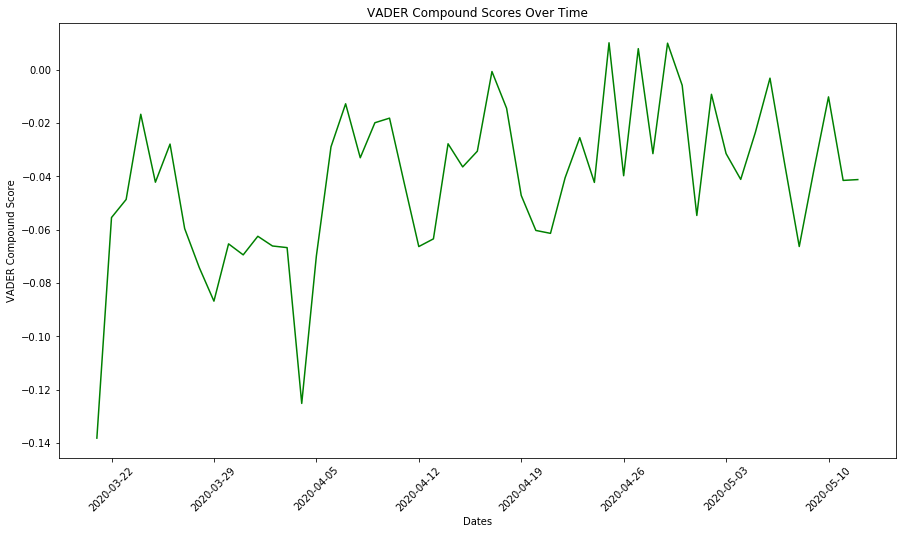

In [10]:
import matplotlib.ticker as ticker
dates = pd.date_range('2020-03-21', '2020-05-21')
plt.figure(figsize=(15,8))
plt.plot(compound_date['date'],compound_date['compound'], color = 'g')
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

plt.title('VADER Compound Scores Over Time')
plt.xlabel('Dates')
plt.ylabel('VADER Compound Score')

## Using TextBlob

In [11]:
from textblob import TextBlob
blobs = []
for sentence in titles:
    blob = TextBlob(str(sentence))
    blobs.append(blob)

In [12]:
polarity_scores = []
subjectivity_scores = []
for sentence in blobs:
    polarity_scores.append(sentence.sentiment.polarity)
    subjectivity_scores.append(sentence.sentiment.subjectivity)

In [13]:
news.insert(4, "polarity",polarity_scores)
news.insert(5, "subjectivity",subjectivity_scores)

In [14]:
print(news['polarity'].mean())
print(news['subjectivity'].mean())

0.03520341737428558
0.20797499327883162


In [15]:
news[0:4]

,title,description,date,compound,polarity,subjectivity
0,New York City-area airports halt air traffic a...,The FAA said air traffic was halted at New Yor...,2020-03-21,0.0000,0.136364,0.454545
1,Airline CEOs promise to eliminate dividends an...,CEOs from America's largest publicly traded ai...,2020-03-21,0.2263,0.000000,0.000000
2,Market Basket joins list of grocery stores mod...,The modified schedule begins Monday for all Ma...,2020-03-21,-0.6249,0.000000,0.000000
3,What Happens If Oil Prices Go Negative - OilPr...,The combination of the Saudi Arabia vs Russia ...,2020-03-21,-0.5719,-0.300000,0.400000


In [16]:
polarity_date = news.groupby('date')[['polarity']].mean().reset_index()
subjectivity_date = news.groupby('date')[['subjectivity']].mean().reset_index()

In [17]:
polarity_date[0:4]

,date,polarity
0,2020-03-21,0.023438
1,2020-03-22,0.050686
2,2020-03-23,0.027948
3,2020-03-24,0.033819


In [18]:
subjectivity_date[0:4]

,date,subjectivity
0,2020-03-21,0.394830
1,2020-03-22,0.226460
2,2020-03-23,0.193343
3,2020-03-24,0.195202


Text(0, 0.5, 'Polarity')

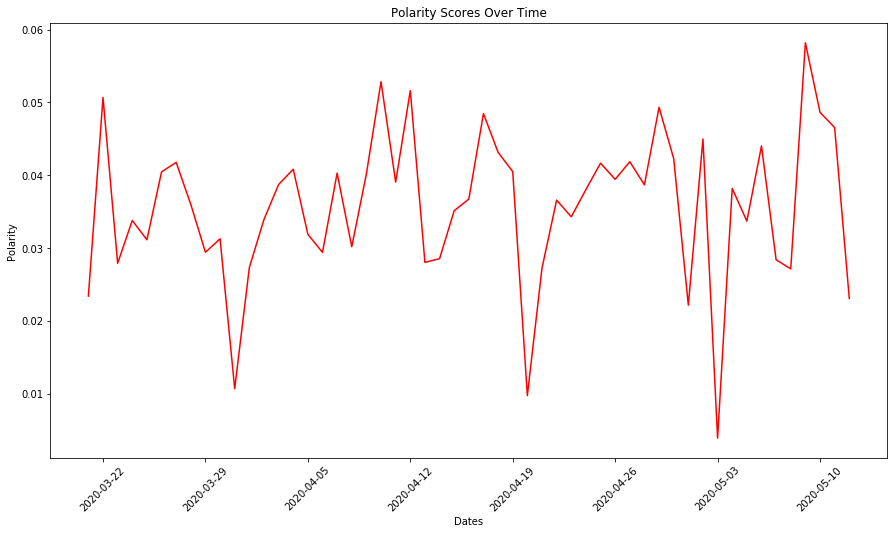

In [19]:
dates = pd.date_range('2020-03-21', '2020-05-21')
plt.figure(figsize=(15,8))
plt.plot(polarity_date['date'],polarity_date['polarity'], color = 'r')
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.title('Polarity Scores Over Time')
plt.xlabel('Dates')
plt.ylabel('Polarity')

Text(0, 0.5, 'Subjectivity')

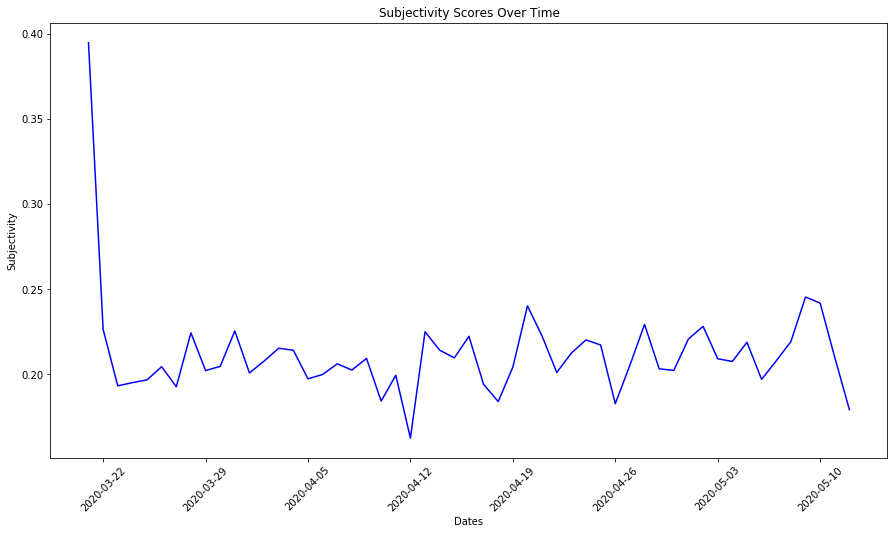

In [20]:
dates = pd.date_range('2020-03-21', '2020-05-21')
plt.figure(figsize=(15,8))
plt.plot(subjectivity_date['date'],subjectivity_date['subjectivity'], color = 'b')
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.title('Subjectivity Scores Over Time')
plt.xlabel('Dates')
plt.ylabel('Subjectivity')